In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
data = load_digits()
X, y = data.data, data.target
df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


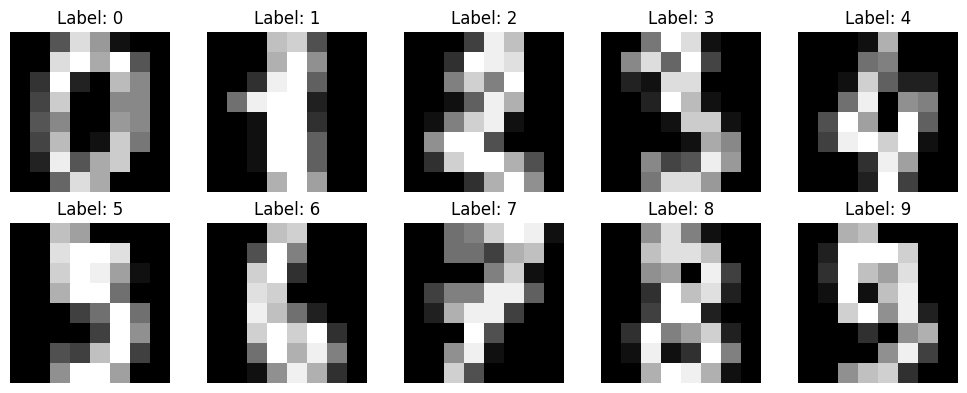

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

# Plot a few images and their labels
for i, ax in enumerate(axes):
    ax.imshow(data.images[i], cmap='gray')
    ax.set_title(f"Label: {data.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1437, 64)
Testing data shape: (360, 64)


In [7]:
def one_hot_encode(y, num_classes) :
  m = y.shape[0]
  one_hot = np.zeros((m, num_classes))
  one_hot[np.arange(m), y] = 1
  return one_hot

y_train_one_hot = one_hot_encode(y_train, num_classes=10)
y_test_one_hot = one_hot_encode(y_test, num_classes=10)

Weights are basically more emphasis given to certain pixels, to illustrate, we can think of 8, the loop in the middle is a important discrimanatory feature, so the central pixels can be given more weight. Bias is helpful to give some meaningful output when the pixels are mostly empty.

In [8]:
n_features = X_train.shape[1]
n_classes = 10  # The Digits dataset has 10 classes (0-9)

# Initialize weights with small random numbers
W = np.random.randn(n_features, n_classes) * 0.01

# Initialize biases with zeros
b = np.zeros(n_classes)

print(f"Shape of weight matrix (W): {W.shape}")
print(f"Shape of bias vector (b): {b.shape}")

Shape of weight matrix (W): (64, 10)
Shape of bias vector (b): (10,)


In [9]:
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):

  # y_true (np.array): One-hot encoded true labels.
  # y_pred (np.array): Predicted probabilities from the softmax function.

  m = y_true.shape[0]
  log_likelihood = -np.log(y_pred[np.arange(m), np.argmax(y_true, axis=1)])
  return np.mean(log_likelihood)

In [10]:
alpha = 0.01
num_iterations = 2000

for iteration in range(num_iterations):

    logits = np.dot(X_train, W) + b #equivalent to theta(X)
    y_pred = softmax(logits)
    loss = cross_entropy_loss(y_train_one_hot, y_pred)
    error = y_pred - y_train_one_hot
    grad_W = (1 / len(X_train)) * np.dot(X_train.T, error)
    grad_b = (1 / len(X_train)) * np.sum(error, axis=0)

    W -= alpha * grad_W
    b -= alpha * grad_b

    # Print the loss every 200 epochs to monitor progress
    if iteration % 200 == 0:
        print(f"Epoch {iteration}: Loss = {loss:.4f}")

Epoch 0: Loss = 2.4674
Epoch 200: Loss = 0.1244
Epoch 400: Loss = 0.0891
Epoch 600: Loss = 0.0722
Epoch 800: Loss = 0.0617
Epoch 1000: Loss = 0.0543
Epoch 1200: Loss = 0.0487
Epoch 1400: Loss = 0.0444
Epoch 1600: Loss = 0.0408
Epoch 1800: Loss = 0.0379


In [13]:
logits_test = np.dot(X_test, W) + b
probabilities_test = softmax(logits_test)
y_pred = np.argmax(probabilities_test, axis=1)
print("Predicted vs. Actual Labels (First 20 Samples):")
print("Predicted:", y_pred[:30])
print("Actual:   ", y_test[:30])

Predicted vs. Actual Labels (First 20 Samples):
Predicted: [1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 9 6 1 3 7]
Actual:    [1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7]


In [11]:
logits_test = np.dot(X_test, W) + b
probabilities_test = softmax(logits_test)
y_pred = np.argmax(probabilities_test, axis=1)
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 96.67%
